# Create a numpy array with data points and plot them. Draw the dendograms for the data points and determine the optimal number of clusters. Then run the HAC algorithm (fit the model and predict the results) and plot the results.

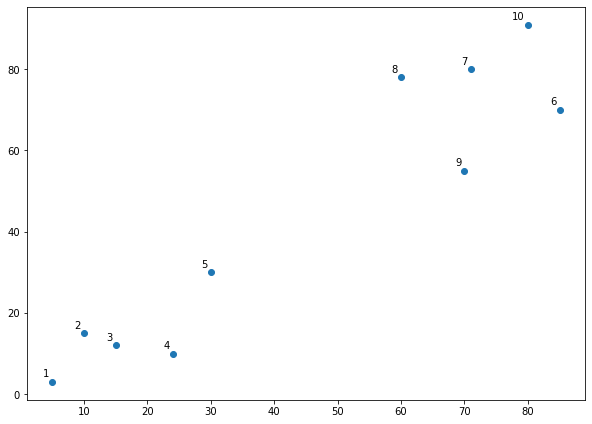

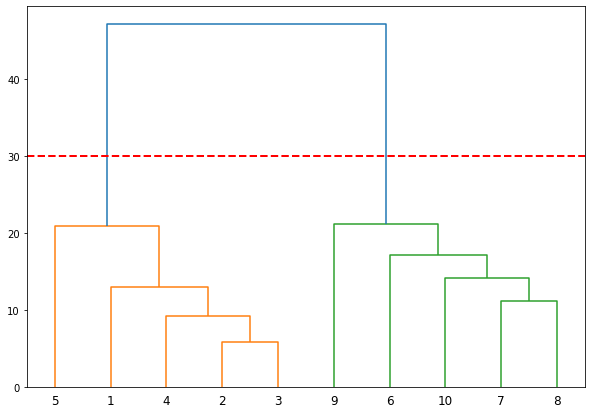

8
4
2
[1 1 1 1 3 0 0 0 2 0]


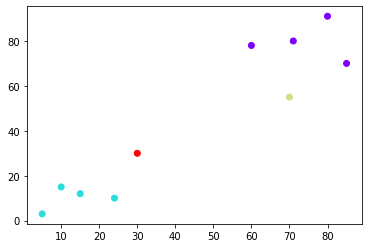

In [29]:
#import needed libraries
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#Create an array of data points
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])
#Plot the data points
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
#adding label on each data point starting from 0
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()
#start calculating the distance between each data point using (nearest point algorithm)
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
 
# add horizontal line at a given distance to determine optimal number of clusters
plt.axhline(y=30, c='red', lw=2, linestyle='dashed')

plt.show()
#initialize function  for calculating the number of optimal clusters
def  get_opt_num_of_clusters(height, Z):
    num_of_leaves = Z.shape[0] + 1
    merge_heights = Z[:, 2]
    num_of_clusters  = num_of_leaves - np.digitize(height, merge_heights)
    return num_of_clusters

#Get number of clusters for a given distance
print(get_opt_num_of_clusters(10, linked))
print(get_opt_num_of_clusters(20, linked))
print(get_opt_num_of_clusters(30, linked))

#Apply the HAC algorithm
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                  linkage='single')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

